In [1]:
import io, os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.options.mode.copy_on_write = True  # cleaner than chained assignment warnings

# --- Upload aw_fb_data.csv ---
from google.colab import files
print("Please upload aw_fb_data.csv …")
up = files.upload()
assert len(up) == 1, "Please upload exactly one file: aw_fb_data.csv"
fname = list(up.keys())[0]
assert "aw_fb_data" in fname, "Expected a file named like 'aw_fb_data.csv'"
awfb = pd.read_csv(io.BytesIO(up[fname]))

print("Loaded:", fname, "| shape:", awfb.shape)
display(awfb.head())

Please upload aw_fb_data.csv …


Saving aw_fb_data_synth_10000.csv to aw_fb_data_synth_10000.csv
Loaded: aw_fb_data_synth_10000.csv | shape: (10000, 20)


,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,0,1,25,1,156.921647,74.872053,62.986954,68.135806,10.173303,0.092330,6.280164,6.281904,62.584922,-0.903196,7.511803,0.042224,1.282418,5.815576,apple watch,Lying
1,1,2,20,1,182.221336,68.475631,16.316123,56.208551,0.168211,0.025374,6.231803,5.714110,54.682353,0.236376,6.551301,0.029993,15.995793,0.414000,apple watch,Lying
2,2,3,32,1,179.784072,75.098988,1.000000,71.707234,15.310934,0.000440,6.134085,6.229458,54.693268,-1.000000,21.370364,0.135383,0.590429,0.000440,apple watch,Lying
3,3,4,31,0,158.224936,63.317797,687.052829,61.474449,2.279399,0.365399,5.931150,6.137201,62.336502,-1.000000,-10.166910,-0.011700,17.857847,251.048078,apple watch,Lying
4,4,5,23,1,177.145549,95.523413,101.474466,73.488328,11.770796,0.000440,6.243469,6.309696,56.299818,1.000000,14.208968,0.161462,4.113836,0.044649,apple watch,Lying


In [2]:
# --- Basic checks ---
print("\nNull counts:")
display(awfb.isnull().sum())


Null counts:


,0
Unnamed: 0,0
X1,0
age,0
gender,0
height,0
weight,0
steps,0
hear_rate,0
calories,0
distance,0


In [3]:
# Ensure expected columns exist
expected_cols = {
    'Unnamed: 0','X1','age','gender','height','weight','steps','hear_rate','calories','distance',
    'entropy_heart','entropy_setps','resting_heart','corr_heart_steps','norm_heart',
    'intensity_karvonen','sd_norm_heart','steps_times_distance','device','activity'
}
missing = expected_cols - set(awfb.columns)
if missing:
    print("WARNING: Missing expected columns:", missing)

# --- Device splits ---
aw_df  = awfb.loc[awfb["device"].str.lower().eq("apple watch")].copy()
fb_df  = awfb.loc[awfb["device"].str.lower().eq("fitbit")].copy()
df_dict = {"Apple Watch": aw_df, "FitBit": fb_df}

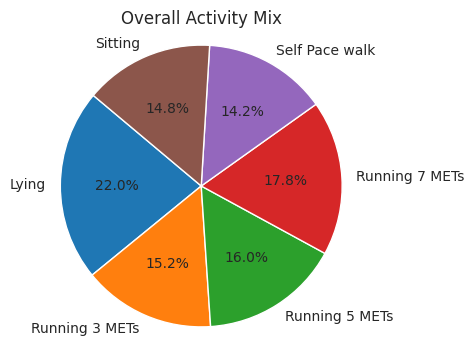

In [4]:
# =============== 1) Overall Activity distribution ===============
plt.figure(figsize=(4,4))
activity_counts = awfb["activity"].value_counts().sort_index()
plt.pie(activity_counts, labels=activity_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Overall Activity Mix")
plt.axis("equal")
plt.show()

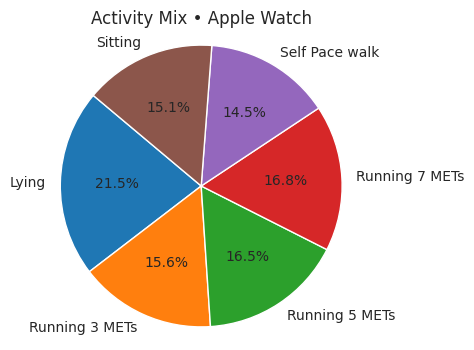

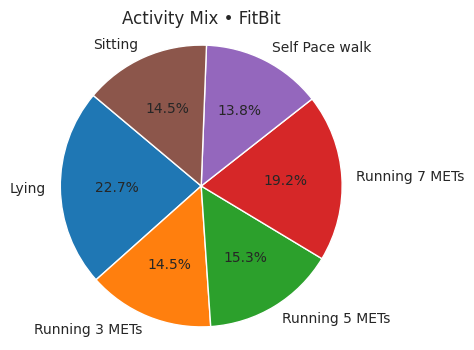

In [5]:
# =============== 2) Activity distribution (per device) ===============
for device, df in df_dict.items():
    if df.empty:
        continue
    activity_group = df["activity"].value_counts().sort_index()
    plt.figure(figsize=(4,4))
    plt.pie(activity_group, labels=activity_group.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Activity Mix • {device}")
    plt.axis("equal")
    plt.show()

/tmp/ipython-input-3266337204.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=tmp, x="activity", y="intensity_karvonen",


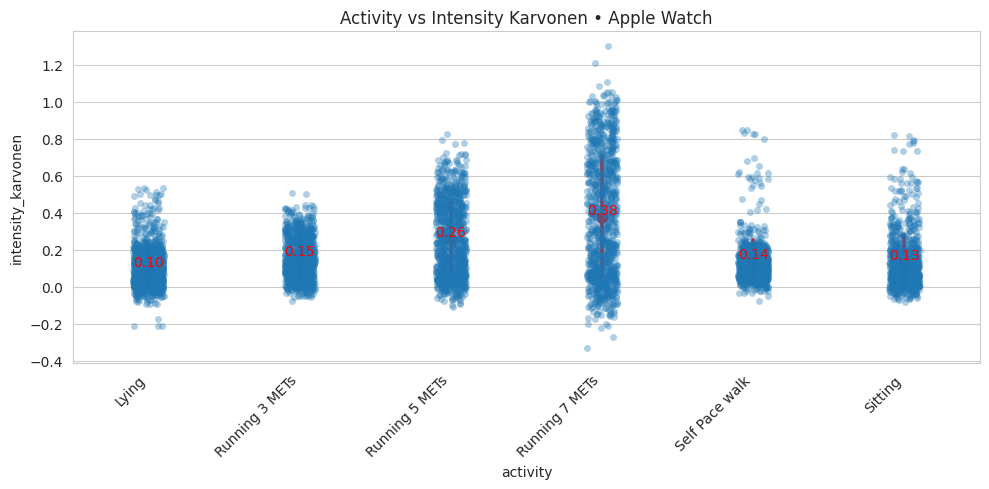

/tmp/ipython-input-3266337204.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=tmp, x="activity", y="intensity_karvonen",


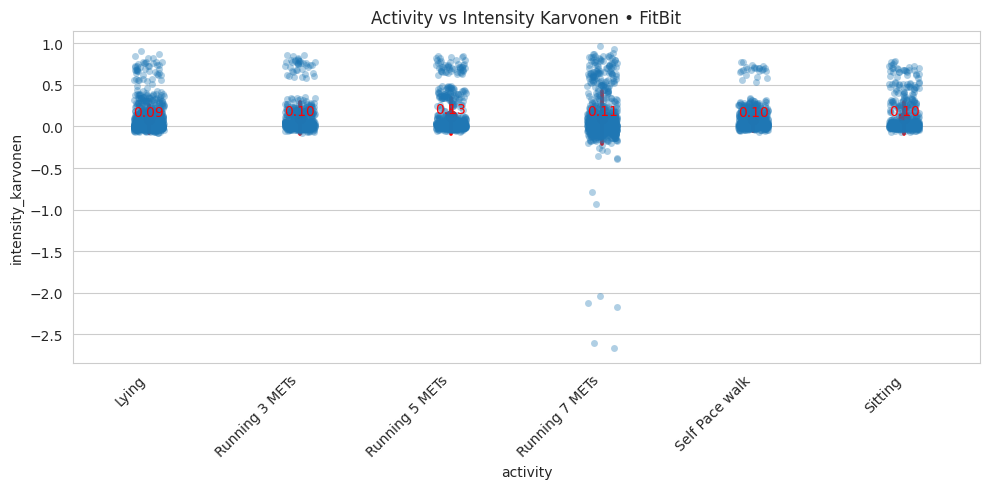

In [6]:
# =============== 3) Activity vs Intensity (strip + mean±sd) ===============
for device, df in df_dict.items():
    if df.empty:
        continue
    tmp = df.copy()
    plt.figure(figsize=(10,5))
    ax = sns.stripplot(data=tmp, x="activity", y="intensity_karvonen", alpha=.35)
    sns.pointplot(data=tmp, x="activity", y="intensity_karvonen",
                  estimator="mean", errorbar="sd", join=False, color="red")
    means = tmp.groupby("activity", observed=True)["intensity_karvonen"].mean()
    for i, (act, val) in enumerate(means.items()):
        ax.text(i, val, f"{val:.2f}", color="red", ha="center", va="bottom")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Activity vs Intensity Karvonen • {device}")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3017355905.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=tmp, x="activity", y="calories",


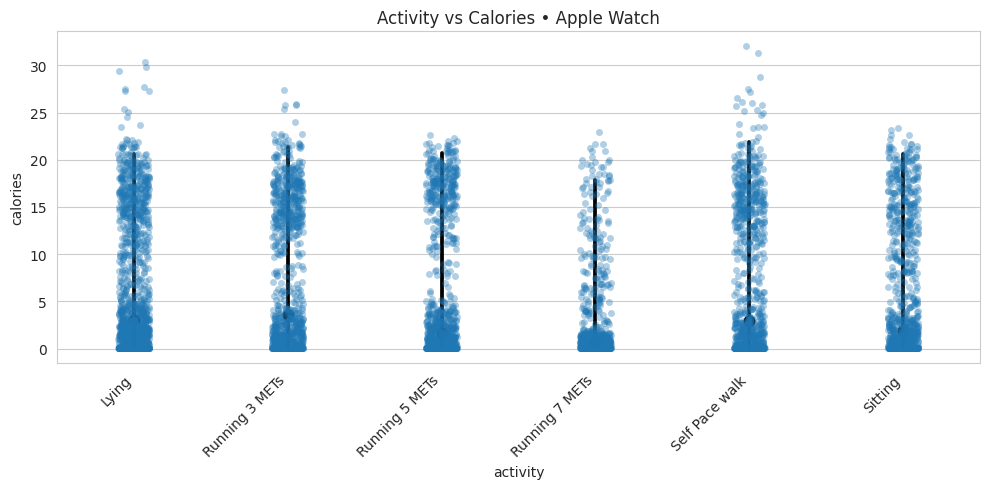

/tmp/ipython-input-3017355905.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=tmp, x="activity", y="calories",


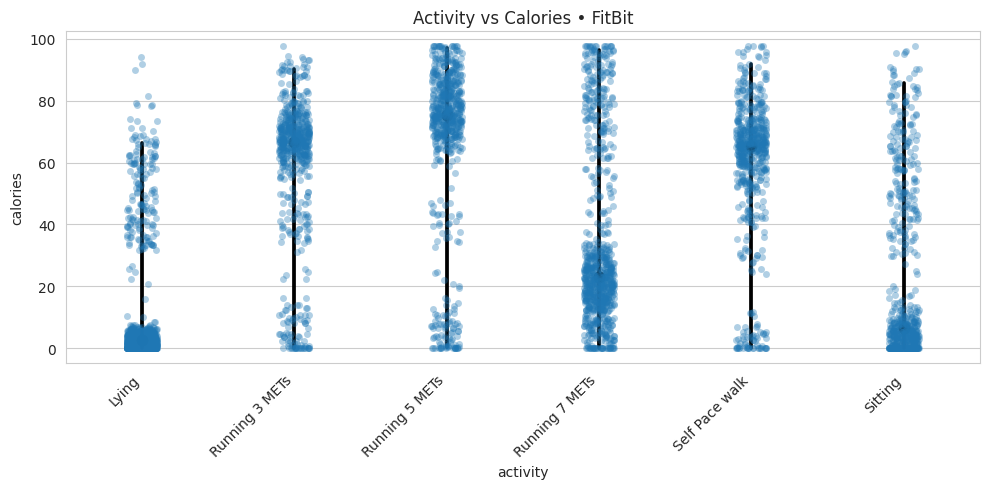

In [7]:
# =============== 4) Activity vs Calories (strip + median) ===============
for device, df in df_dict.items():
    if df.empty:
        continue
    tmp = df.copy()
    plt.figure(figsize=(10,5))
    sns.stripplot(data=tmp, x="activity", y="calories", alpha=.35)
    sns.pointplot(data=tmp, x="activity", y="calories",
                  estimator="median", errorbar="pi", join=False, color="black")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Activity vs Calories • {device}")
    plt.tight_layout()
    plt.show()

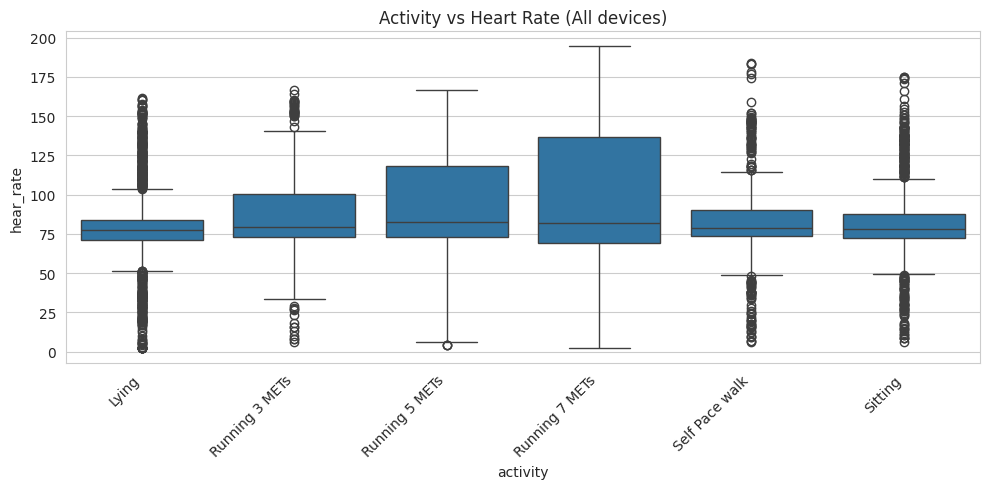

In [8]:

# =============== 5) Boxplot: Activity vs Heart Rate (all devices) ===============
plt.figure(figsize=(10,5))
sns.boxplot(data=awfb, x="activity", y="hear_rate")
plt.xticks(rotation=45, ha="right")
plt.title("Activity vs Heart Rate (All devices)")
plt.tight_layout()
plt.show()

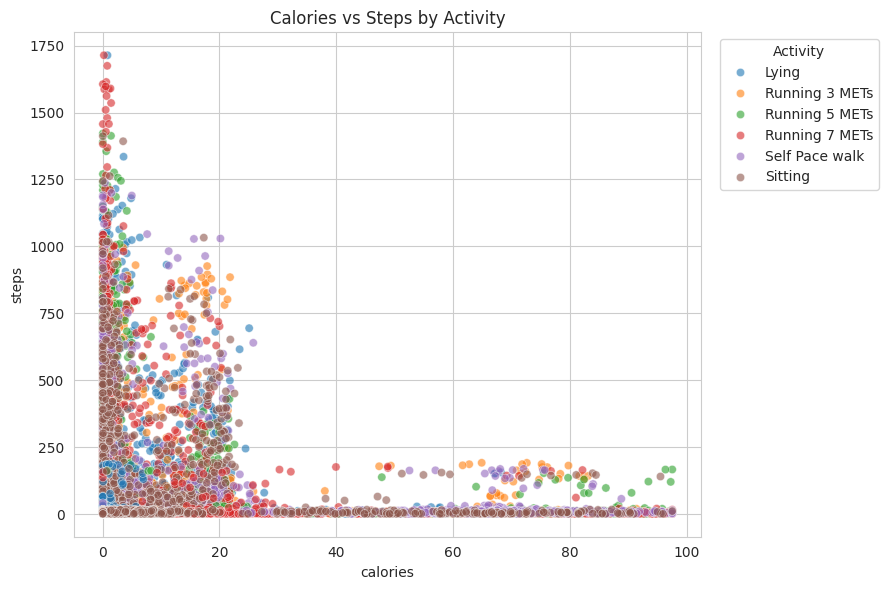

In [10]:
 #=============== 6) Scatter: Calories vs Steps (hue=activity) ===============
plt.figure(figsize=(9,6))
sns.scatterplot(data=awfb, x="calories", y="steps", hue="activity", alpha=.6)
plt.title("Calories vs Steps by Activity")
plt.legend(title="Activity", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

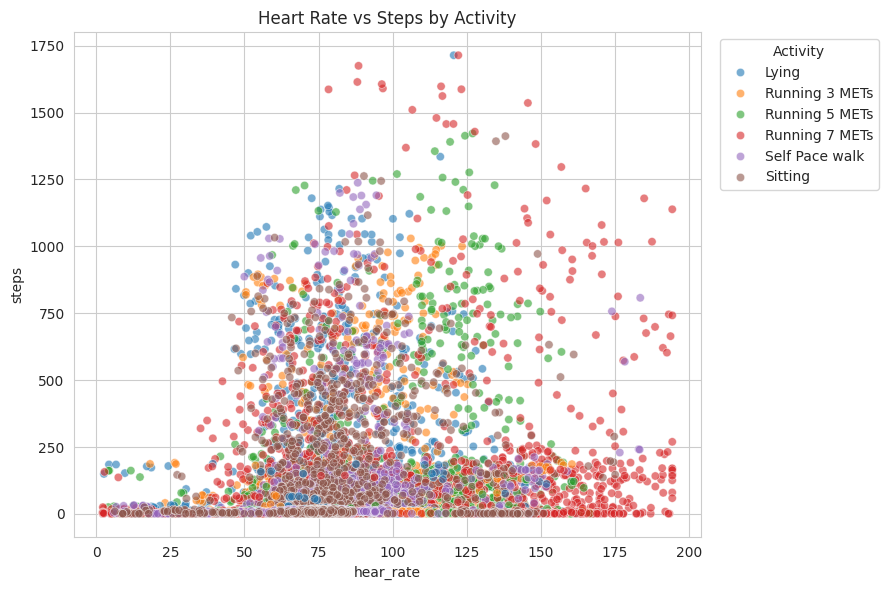

In [11]:
# =============== 7) Scatter: Heart Rate vs Steps (hue=activity) ===============
plt.figure(figsize=(9,6))
sns.scatterplot(data=awfb, x="hear_rate", y="steps", hue="activity", alpha=.6)
plt.title("Heart Rate vs Steps by Activity")
plt.legend(title="Activity", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

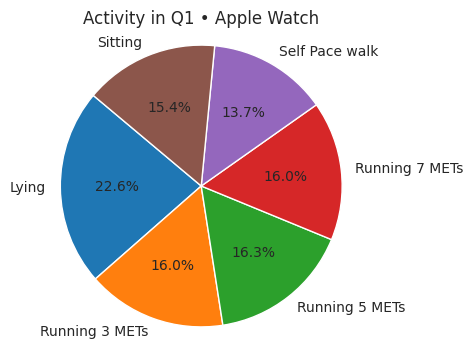

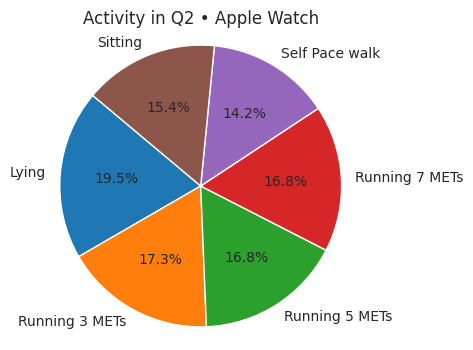

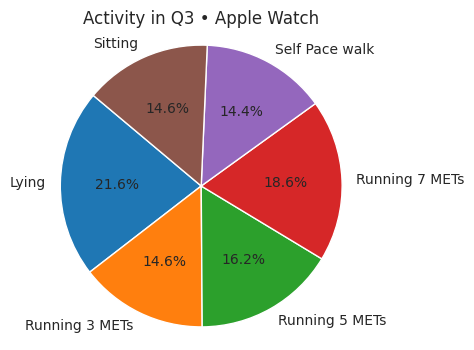

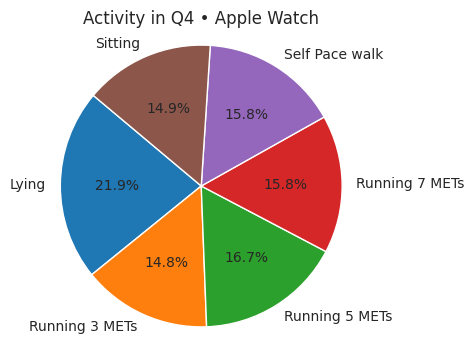

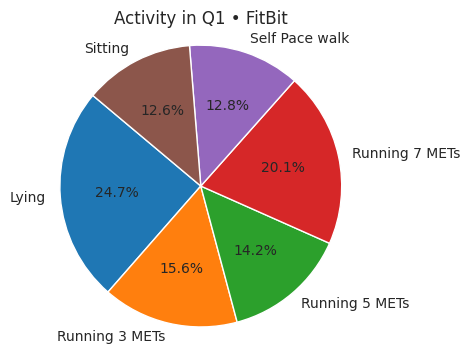

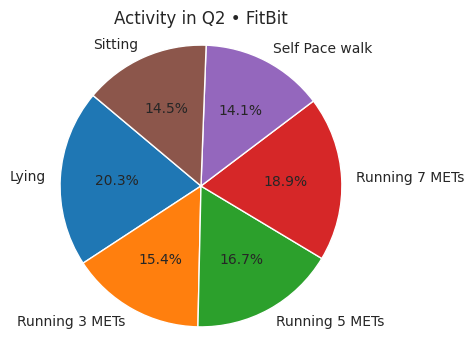

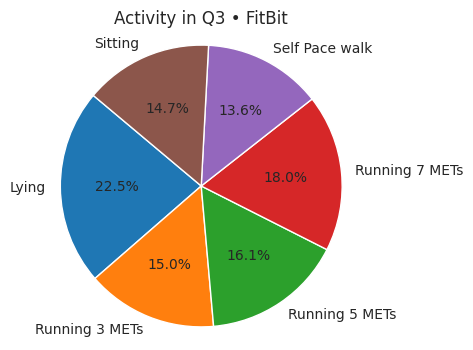

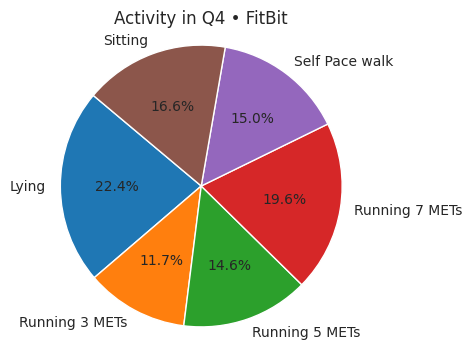

In [12]:
# =============== 8) Activity mix within age bands (per device) ===============
def robust_age_quartiles(series):
    """Return categorical quartiles robustly, even if there are few unique ages."""
    try:
        return pd.qcut(series, q=4, labels=["Q1","Q2","Q3","Q4"])
    except Exception:
        ranks = series.rank(method="average", pct=True)
        return pd.cut(ranks, bins=[0,.25,.5,.75,1.0],
                      labels=["Q1","Q2","Q3","Q4"], include_lowest=True)

for device, df in df_dict.items():
    if df.empty:
        continue
    tmp = df.copy()
    tmp["age_band"] = robust_age_quartiles(tmp["age"])

    activity_ratio = (
        tmp.groupby(["age_band","activity"], observed=True)
           .size()
           .unstack(fill_value=0)
           .apply(lambda x: x / x.sum(), axis=1)
    )

    for age_band in activity_ratio.index:
        plt.figure(figsize=(4,4))
        plt.pie(activity_ratio.loc[age_band], labels=activity_ratio.columns,
                autopct="%1.1f%%", startangle=140)
        plt.title(f"Activity in {age_band} • {device}")
        plt.axis("equal")
        plt.show()

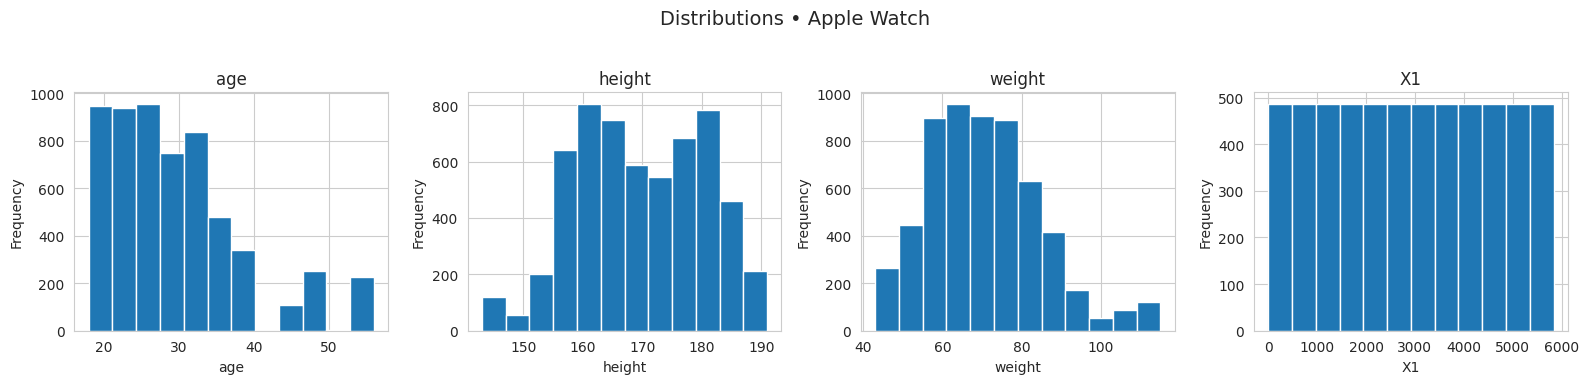

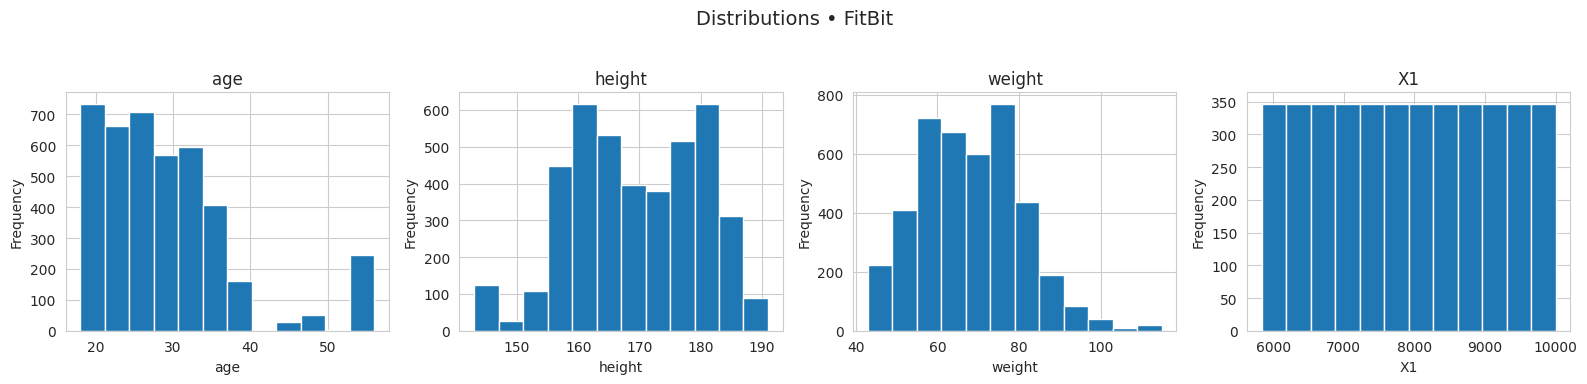

In [14]:
# =============== 9) Histograms: age / height / weight / X1 (per device) ===============
cols = ("age","height","weight","X1")
for device, df in df_dict.items():
    if df.empty:
        continue
    fig, axes = plt.subplots(1, len(cols), figsize=(16,4))
    fig.suptitle(f"Distributions • {device}", fontsize=14)
    for ax, col in zip(axes, cols):
        df[col].plot(kind="hist", ax=ax, bins=12, title=f"{col}")
        ax.set_xlabel(col)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



In [16]:
# =============== 10) Correlation heatmaps (overall + per device) ===============
num_cols = awfb.select_dtypes(include=[np.number]).columns.tolist()
def corr_heatmap(df, title):
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap="vlag", center=0, linewidths=.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()

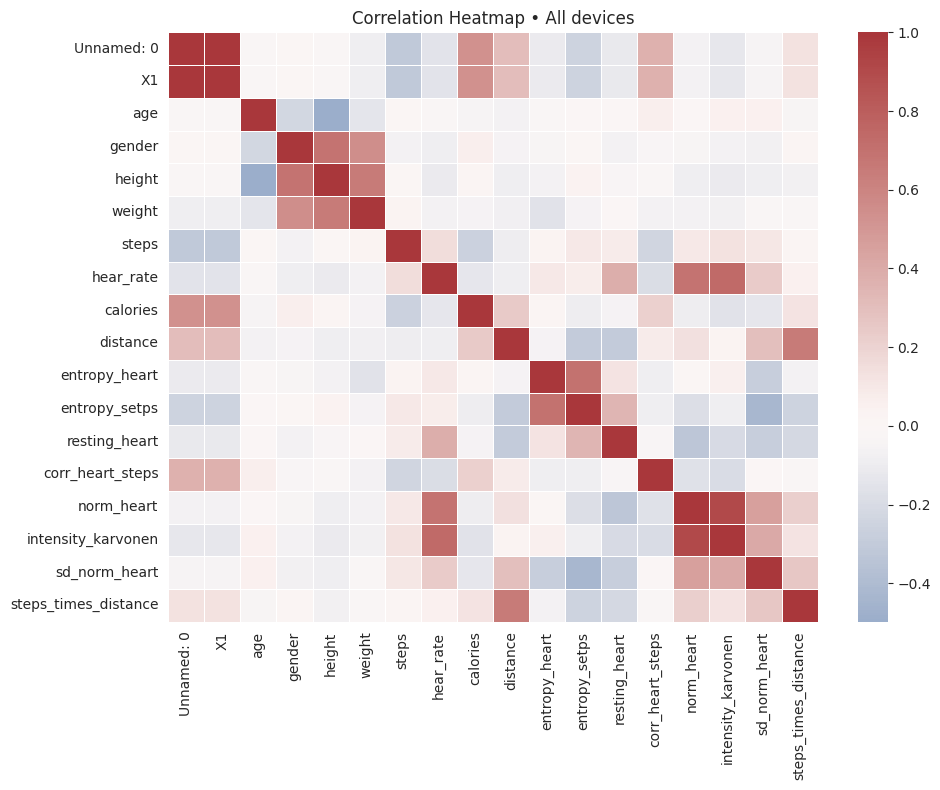

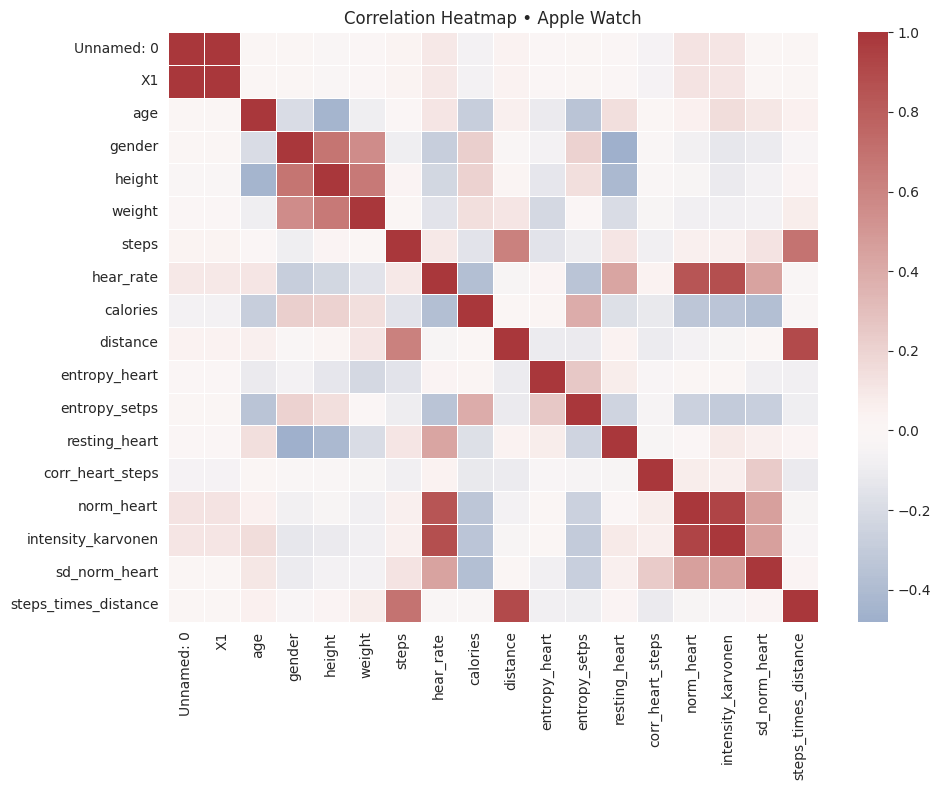

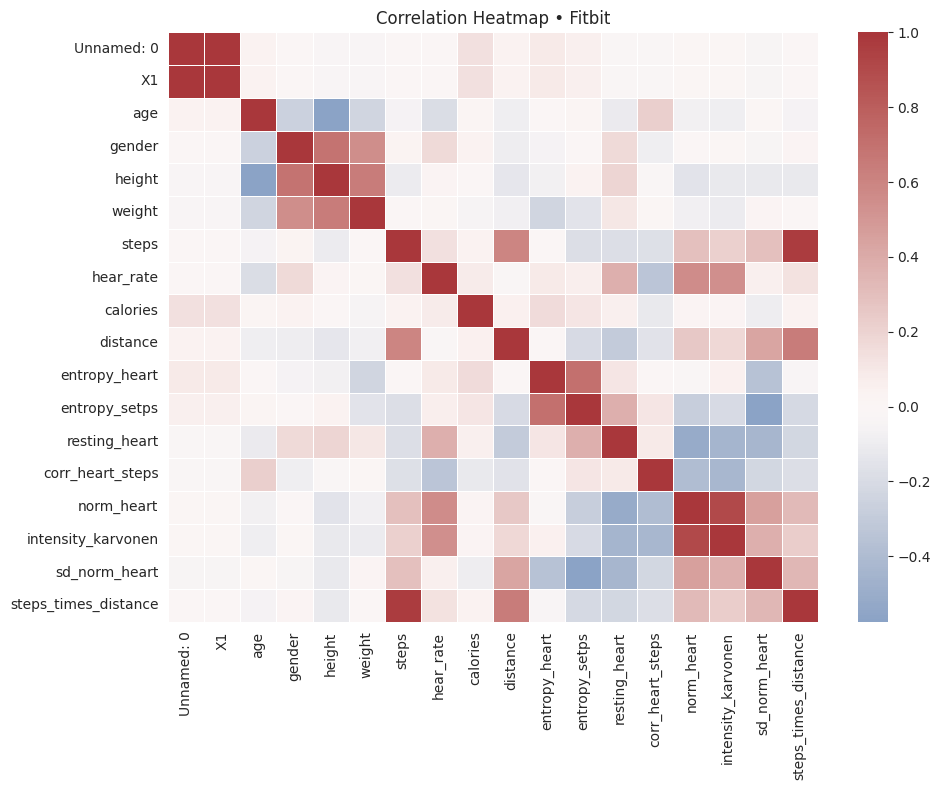

In [17]:
# =============== 10) Correlation heatmaps (overall + per device) ===============
num_cols = awfb.select_dtypes(include=[np.number]).columns.tolist()
def corr_heatmap(df, title):
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap="vlag", center=0, linewidths=.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()

corr_heatmap(awfb, "Correlation Heatmap • All devices")
if not aw_df.empty:
    corr_heatmap(aw_df, "Correlation Heatmap • Apple Watch")
if not fb_df.empty:
    corr_heatmap(fb_df, "Correlation Heatmap • Fitbit")

Loaded: /content/aw_fb_data_synth_10000.csv | shape: (10000, 20)
   Unnamed: 0  X1  age  gender      height     weight      steps  hear_rate  \
0           0   1   25       1  156.921647  74.872053  62.986954  68.135806   
1           1   2   20       1  182.221336  68.475631  16.316123  56.208551   
2           2   3   32       1  179.784072  75.098988   1.000000  71.707234   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0  10.173303  0.092330       6.280164       6.281904      62.584922   
1   0.168211  0.025374       6.231803       5.714110      54.682353   
2  15.310934  0.000440       6.134085       6.229458      54.693268   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0         -0.903196    7.511803            0.042224       1.282418   
1          0.236376    6.551301            0.029993      15.995793   
2         -1.000000   21.370364            0.135383       0.590429   

   steps_times_distance       device activity  
0   

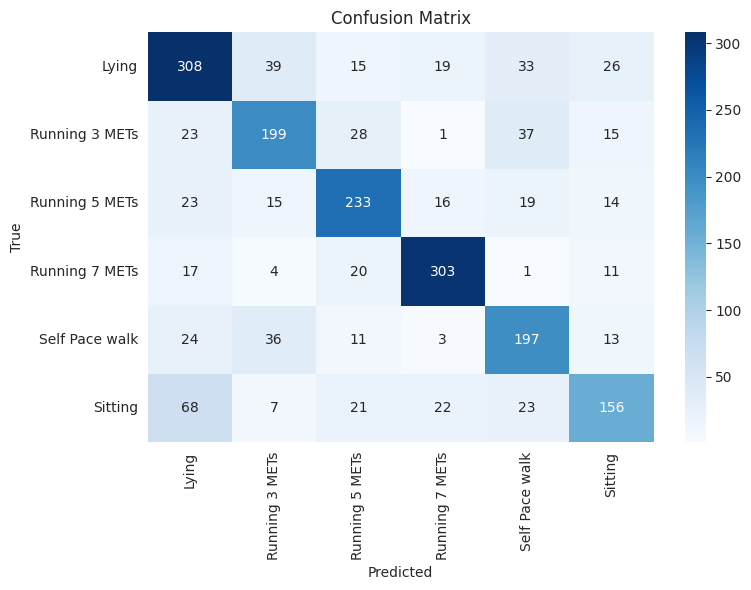


KeyboardInterrupt



In [19]:
# === 0) Setup
!pip -q install scikit-learn matplotlib seaborn joblib

import os, json, zipfile, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from joblib import dump

# === 1) Load data
# Change this to your file if needed (e.g., 'aw_fb_data.csv')
DATA_PATH = "/content/aw_fb_data_synth_10000.csv"

df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH, "| shape:", df.shape)
print(df.head(3))

# === 2) Basic cleaning
index_like = [c for c in ["Unnamed: 0", "X1"] if c in df.columns]
for c in index_like:
    # if it's strictly 1..N, drop it
    if np.issubdtype(df[c].dtype, np.number) and df[c].is_monotonic_increasing:
        pass
# Drop index-like columns regardless (they don't carry signal)
df = df.drop(columns=index_like, errors="ignore")

# Target & features
TARGET = "activity"
if TARGET not in df.columns:
    raise ValueError(f"Target column '{TARGET}' not found. Columns: {list(df.columns)}")

# Identify feature types
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c != TARGET]
num_cols = [c for c in df.columns if c not in cat_cols + [TARGET]]

# (Optional) sanity check on expected columns
print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Target classes:", df[TARGET].unique())

# === 3) Train / test split (stratified by activity)
X = df[num_cols + cat_cols]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nTrain size:", X_train.shape, "Test size:", X_test.shape)

# === 4) Preprocess + Model pipeline
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=True, with_std=True))
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop"
)

# Solid baseline model
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced_subsample",  # helps if classes are imbalanced
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[("prep", preprocess), ("model", rf)])

# === 5) Train
pipe.fit(X_train, y_train)

# === 6) Evaluate
pred = pipe.predict(X_test)
acc = accuracy_score(y_test, pred)
f1m = f1_score(y_test, pred, average="macro")
print("\nAccuracy:", round(acc, 4))
print("Macro-F1:", round(f1m, 4))
print("\nClassification Report:\n", classification_report(y_test, pred, digits=3))

# Confusion matrix plot
cm = confusion_matrix(y_test, pred, labels=pipe.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("/content/confusion_matrix.png", dpi=150)
plt.show()

# === 7) Cross-validated accuracy (quick check)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_acc = cross_val_score(pipe, X, y, cv=skf, scoring="accuracy", n_jobs=-1)
cv_f1m = cross_val_score(pipe, X, y, cv=skf, scoring="f1_macro", n_jobs=-1)
print(f"\n5-fold CV Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"5-fold CV Macro-F1: {cv_f1m.mean():.4f} ± {cv_f1m.std():.4f}")

# === 8) Permutation Importances (works with full pipeline)
# Fit on full train to compute importances on test set
perm = permutation_importance(
    pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring="f1_macro"
)

# Get feature names after preprocessing
ohe = pipe.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
cat_names = list(ohe.get_feature_names_out(cat_cols)) if cat_cols else []
all_feature_names = num_cols + cat_names

imp_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

print("\nTop 15 permutation importances:")
display(imp_df.head(15))

plt.figure(figsize=(8,6))
sns.barplot(data=imp_df.head(15), x="importance_mean", y="feature")
plt.title("Top Permutation Importances (Macro-F1 drop)")
plt.tight_layout()
plt.savefig("/content/feature_importance.png", dpi=150)
plt.show()






